In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
corr_matrix=df.corr()

In [15]:
features=corr_matrix.index

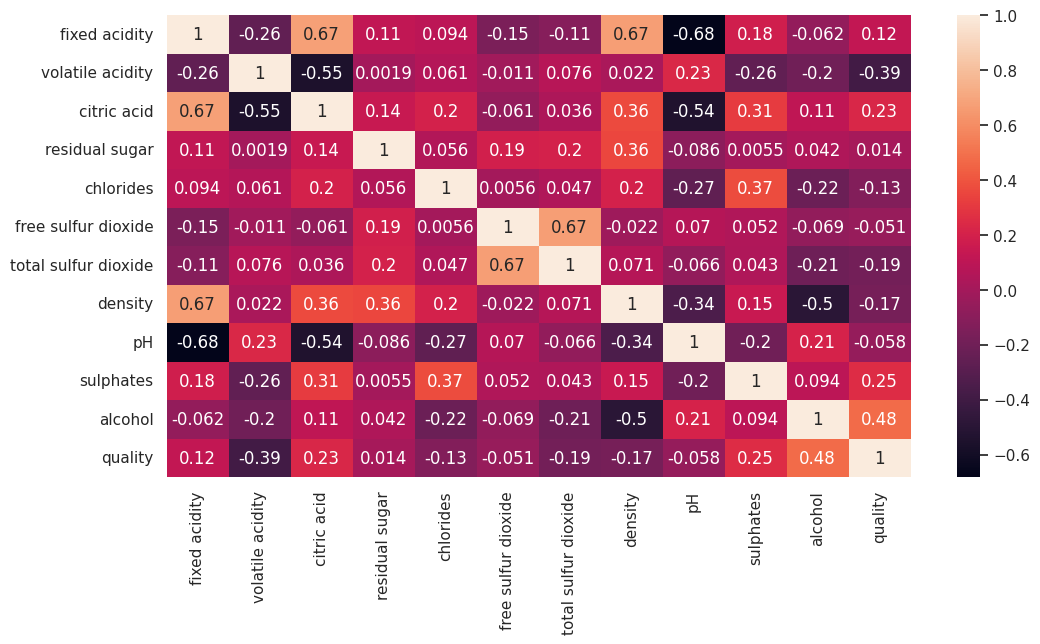

In [17]:
plt.figure(figsize=(12,6))
heatmap=sns.heatmap(df[features].corr(),annot=True)

Quality of wine has a good correlation with fixed acidity, citric acid, sulphates, alcohol and residual sugar but we also clarify by exploring other features in detail

In [20]:
df['pH'].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

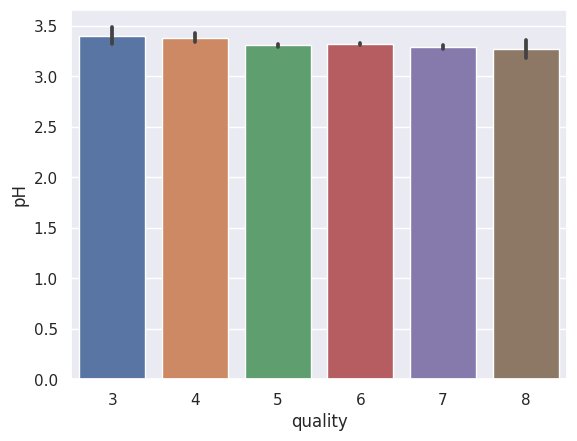

In [21]:
ph_plot=sns.barplot(x='quality',y='pH',data=df)

So all quality of wine has almost similar pH which gives no useful insight

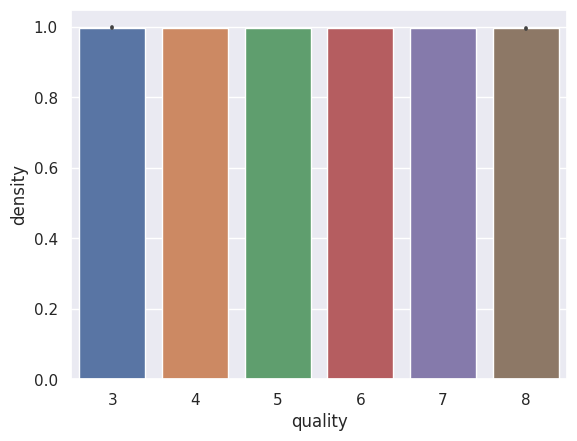

In [24]:
density_plot=sns.barplot(x='quality',y='density',data=df)

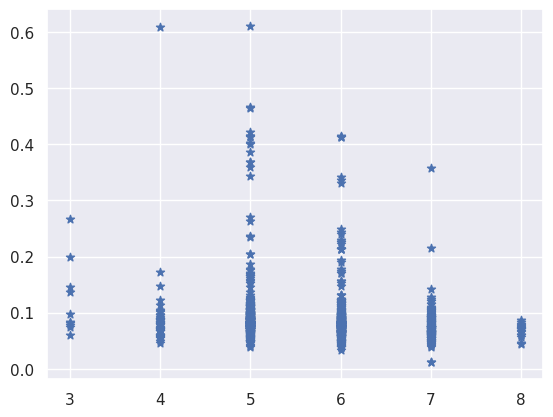

In [25]:
plt.scatter(df['quality'],df['chlorides'],marker='*')

Chloride level more than 0.6 can be considered as an outlier as most of the data falls below this range

In [26]:
df[df['chlorides']>0.6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5


In [29]:
df.shape

(1599, 12)

In [36]:
df=df[df['chlorides']<0.6]
df.shape

(1597, 12)

In [41]:
x=df.iloc[:,:11]
y=df.iloc[:,-1]

In [42]:
x.shape

(1597, 11)

In [43]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [44]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [47]:
y.value_counts()

5    680
6    638
7    199
4     52
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot: >

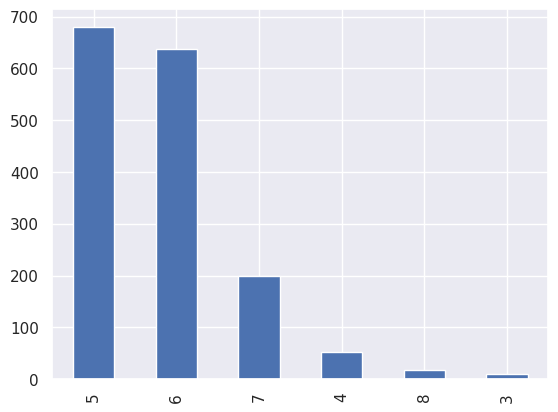

In [46]:
y.value_counts().plot(kind='bar')

Data is quite imbalanced so we need to handle this. Let's perform oversampling technique SMOTE to handle class imbalance

In [48]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=5)
x,y=oversample.fit_resample(x,y)


In [49]:
x.shape

(4080, 11)

In [50]:
y.value_counts()

5    680
6    680
7    680
4    680
8    680
3    680
Name: quality, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=33)

In [53]:
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)


In [54]:
logreg=LogisticRegression()
svc=SVC()
dtree=DecisionTreeClassifier()
knn=KNeighborsClassifier(5)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=20)

In [55]:
logreg.fit(xtrain,ytrain)
svc.fit(xtrain,ytrain)
dtree.fit(xtrain,ytrain)
knn.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', random_state=20)

In [56]:
logreg_predict=logreg.predict(xtest)
svc_predict=svc.predict(xtest)
dtree_predict=dtree.predict(xtest)
knn_predict=knn.predict(xtest)
rf_predict=rf.predict(xtest)

In [57]:
from sklearn.metrics import accuracy_score

In [64]:
print("Accuracy of Logistic Regression: ",(accuracy_score(logreg_predict,ytest))*100)
print("Accuracy of SVM: ",(accuracy_score(svc_predict,ytest))*100)
print("Accuracy of Decision Tree: ",(accuracy_score(dtree_predict,ytest))*100)
print("Accuracy of Random Forest: ",(accuracy_score(rf_predict,ytest))*100)
print("Accuracy of KNN: ",(accuracy_score(knn_predict,ytest))*100)

Accuracy of Logistic Regression:  60.78431372549019
Accuracy of SVM:  76.47058823529412
Accuracy of Decision Tree:  80.51470588235294
Accuracy of Random Forest:  87.99019607843137
Accuracy of KNN:  79.41176470588235
